In [1]:
#import the libraries to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

-----------------START THE DATA CLEANING------------------

In [3]:
#leemos el csv
libros = pd.read_csv('books.csv')

In [4]:
#VERIFICAMOS EL CONTENIDO DEL CSV
libros.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
#OBSERVAMOS LA INFORMACION QUE HAY EN LAS COLUMNAS
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
#we verify that there is no duplicate data
libros.duplicated().any()

False

<Axes: >

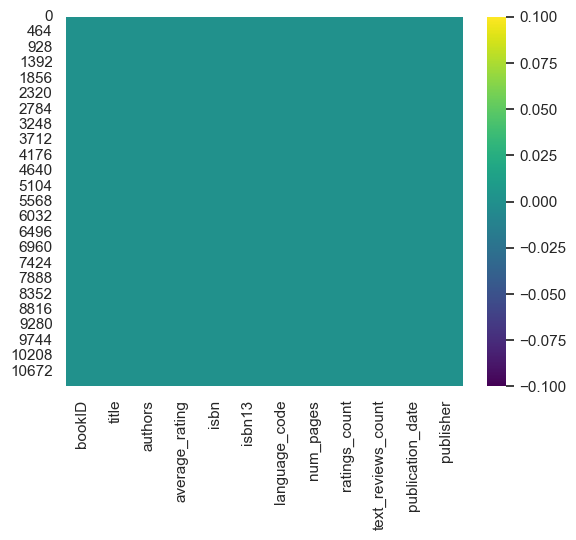

In [7]:
#We will use a heat map to see the result.

sns.heatmap(libros.isnull(), cmap='viridis')

#we found no null values

---------------DATA VISUALIZATION--------------------

C:\Users\Brai\AppData\Local\Temp\ipykernel_17232\2753184299.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(libros['average_rating'], shade= True)


Text(0, 0.5, 'Frecuencia/Frecuency')

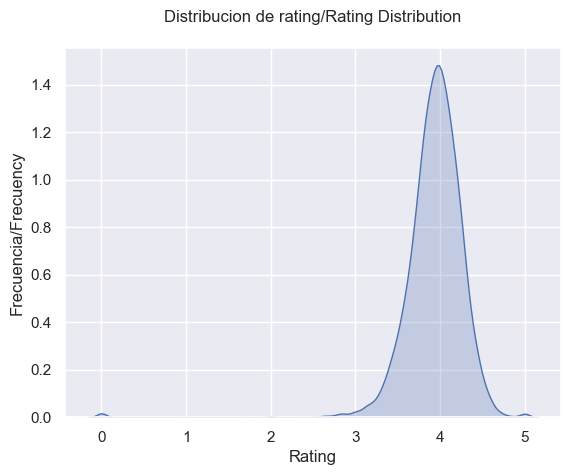

In [8]:
#ratings distribution

sns.kdeplot(libros['average_rating'], shade= True)
plt.title('Distribucion de rating/Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frecuencia/Frecuency')

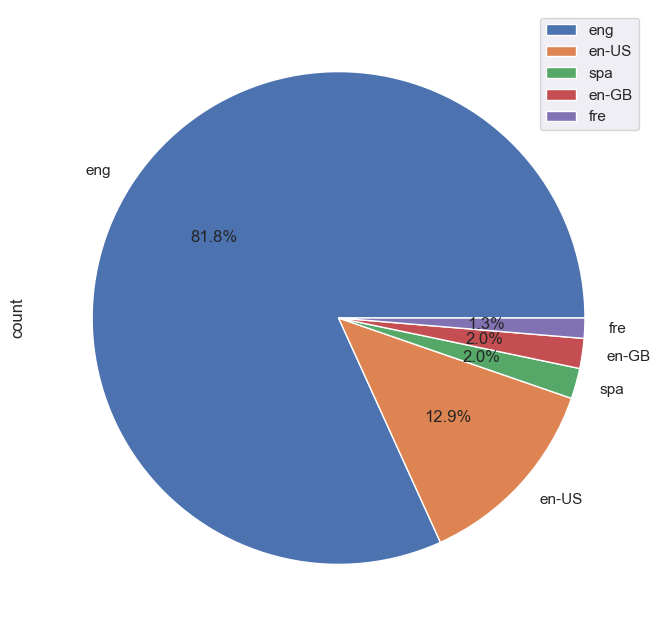

In [9]:
# top 5 languages in books
libros['language_code'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8)). legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.92'),
  Text(4, 0, '3.93'),
  Text(5, 0, '3.94'),
  Text(6, 0, '3.96'),
  Text(7, 0, '3.97'),
  Text(8, 0, '3.98'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

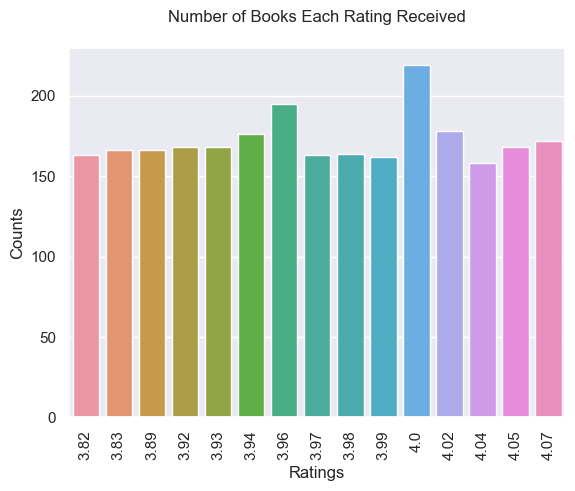

In [10]:
#NUMBER OF BOOKS PER RATING
rating_counts = libros['average_rating'].value_counts().head(15)
data = pd.DataFrame({'rating': rating_counts.index, 'count': rating_counts.values})
sns.barplot(data=data, x='rating', y='count')
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=90)

The number of books that receive a rating between 3.96 and 4.0 tend to have a higher number of sales.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Twilight (Twilight  #1)'),
  Text(1, 0, 'The Hobbit  or There and Back Again'),
  Text(2, 0, 'The Catcher in the Rye'),
  Text(3, 0, 'Angels & Demons (Robert Langdon  #1)'),
  Text(4, 0, 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'),
  Text(5, 0, 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'),
  Text(6, 0, 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'),
  Text(7, 0, 'The Fellowship of the Ring (The Lord of the Rings  #1)'),
  Text(8, 0, 'Animal Farm'),
  Text(9, 0, 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)')])

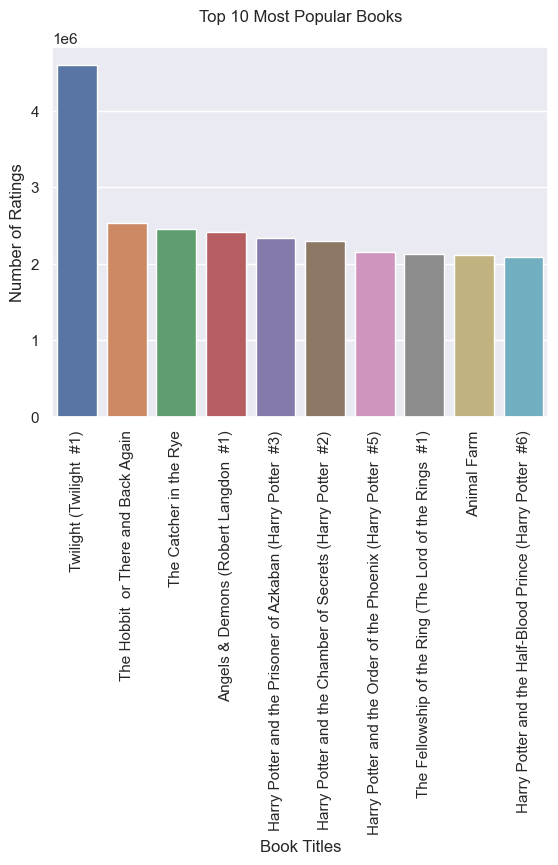

In [11]:
#best rated books
popular_books = libros.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(x=popular_books.index, y=popular_books)
plt.title('Top 10 Most Popular Books\n')
plt.xlabel('Book Titles')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

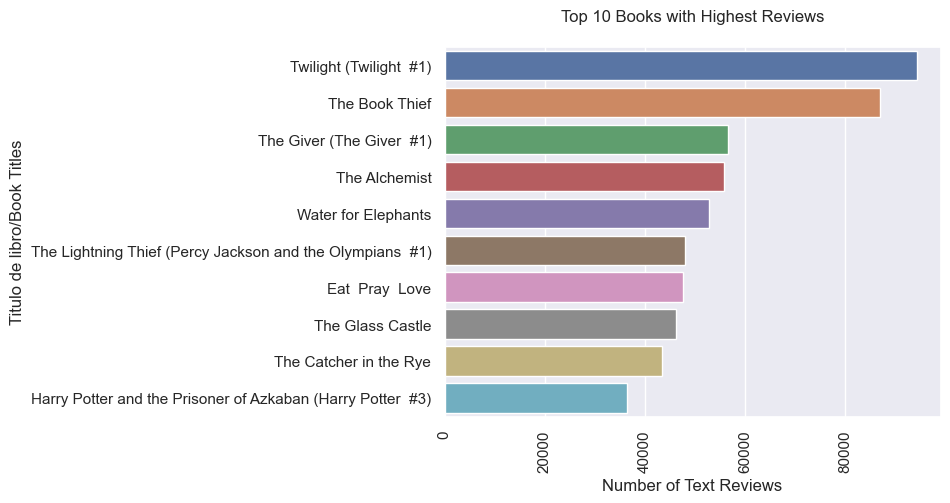

In [12]:
#books with best reviews
highest_reviews = libros.nlargest(10, ['text_reviews_count'])
sns.barplot(x='text_reviews_count', y='title', data=highest_reviews)
plt.title('Top 10 Books with Highest Reviews\n')
plt.xlabel('Number of Text Reviews')
plt.ylabel('Titulo de libro/Book Titles')
plt.xticks(rotation=90)

The books with more reviews, usually have a greater reception of people, so it attracts the curiosity of the reader to know what the book is about and perhaps choose to buy it, if the description of it is part of their tastes.

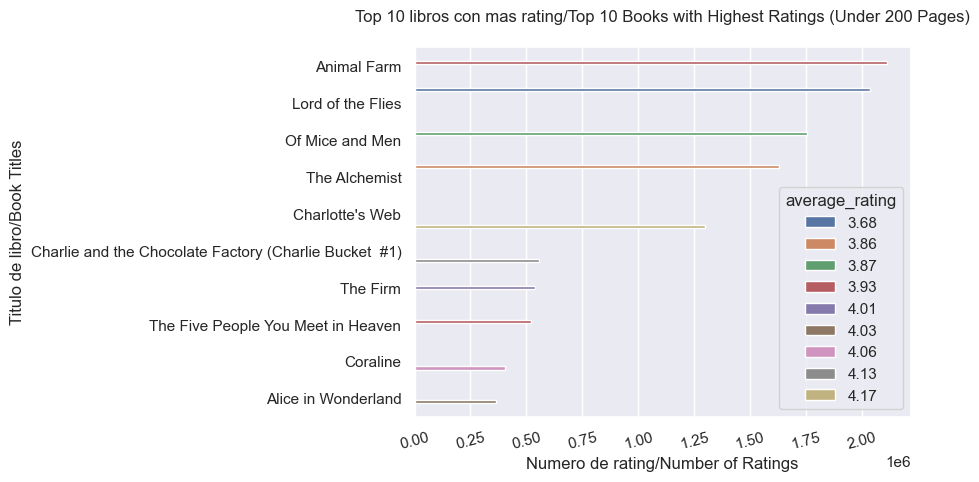

In [13]:
#top 10 books with less than 200 pages
under200 = libros[libros['num_pages'] <= 200]
top10under200 = under200.nlargest(10, 'ratings_count')
sns.barplot(x=top10under200['ratings_count'], y=top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)
plt.title('Top 10 libros con mas rating/Top 10 Books with Highest Ratings (Under 200 Pages)\n')
plt.xlabel('Numero de rating/Number of Ratings')
plt.ylabel('Titulo de libro/Book Titles')
plt.show()

Here is a list of the top rated books that contain less than 200 pages

Text(0, 0.5, 'Titulo de libro/Book Titles')

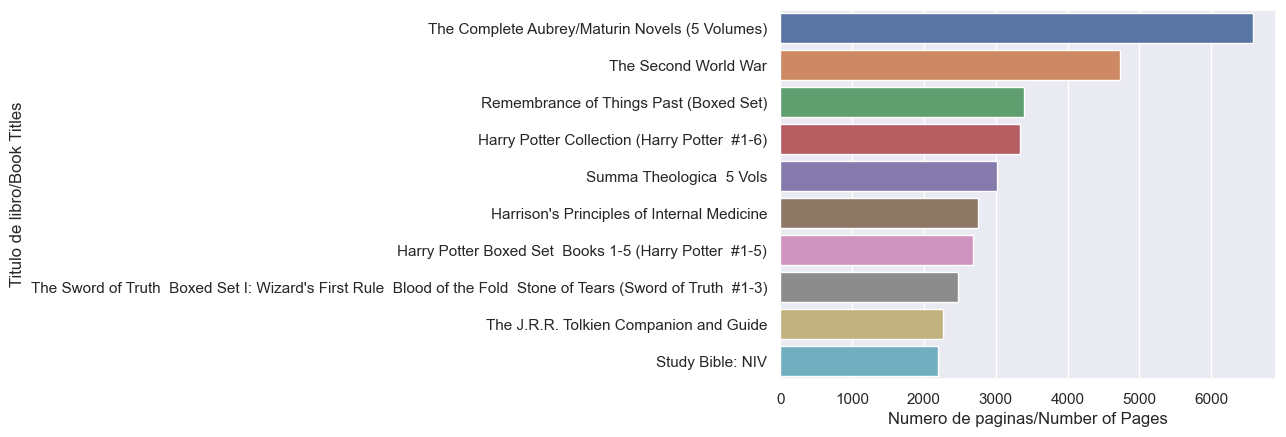

In [14]:
#top 10 longest books
longest_books = libros.nlargest(10, ['num_pages']).set_index('title')
sns.barplot(x=longest_books['num_pages'], y=longest_books.index)
plt.xlabel('Numero de paginas/Number of Pages')
plt.ylabel('Titulo de libro/Book Titles')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'eng'),
  Text(1, 0, 'en-US'),
  Text(2, 0, 'spa'),
  Text(3, 0, 'en-GB'),
  Text(4, 0, 'fre'),
  Text(5, 0, 'ger'),
  Text(6, 0, 'jpn'),
  Text(7, 0, 'mul'),
  Text(8, 0, 'zho'),
  Text(9, 0, 'grc'),
  Text(10, 0, 'por'),
  Text(11, 0, 'en-CA'),
  Text(12, 0, 'ita'),
  Text(13, 0, 'enm'),
  Text(14, 0, 'lat'),
  Text(15, 0, 'swe'),
  Text(16, 0, 'rus'),
  Text(17, 0, 'srp'),
  Text(18, 0, 'nl'),
  Text(19, 0, 'msa'),
  Text(20, 0, 'glg'),
  Text(21, 0, 'wel'),
  Text(22, 0, 'ara'),
  Text(23, 0, 'nor'),
  Text(24, 0, 'tur'),
  Text(25, 0, 'gla'),
  Text(26, 0, 'ale')])

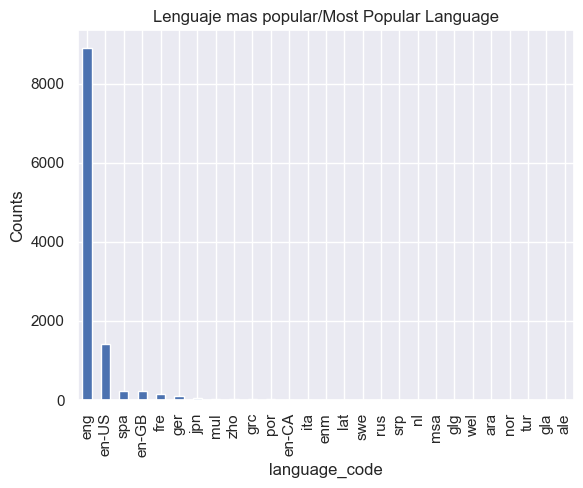

In [15]:
#top languages
libros['language_code'].value_counts().plot(kind='bar')
plt.title('Lenguaje mas popular/Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation= 90)

In this graph we can see that the amount of books in English is much more predominant than the rest of the languages, so we can deduce that it generates 2 effects on sales:

1º The sales of the book in English worldwide are high, but having only 1 language those Spanish-speaking countries will not buy the book unless their level of English is sufficient to understand the reading.
2º If the book had more than 1 language, sales would increase greatly but this in turn requires more investment to offset the cost of translation into more than 1 language.

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

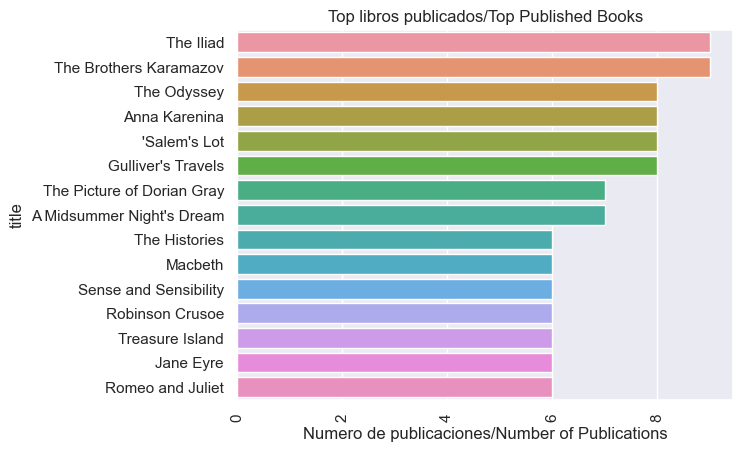

In [16]:
#top books published
sns.barplot(x=libros['title'].value_counts()[:15], y=libros['title'].value_counts().index[:15])
plt.title('Top libros publicados/Top Published Books')
plt.xlabel('Numero de publicaciones/Number of Publications')
plt.xticks(rotation=90)

C:\Users\Brai\AppData\Local\Temp\ipykernel_17232\2969780050.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=authors['ratings_count'], y=authors.index, ci= None, hue=authors['title'])


Text(0.5, 0, 'Total Ratings')

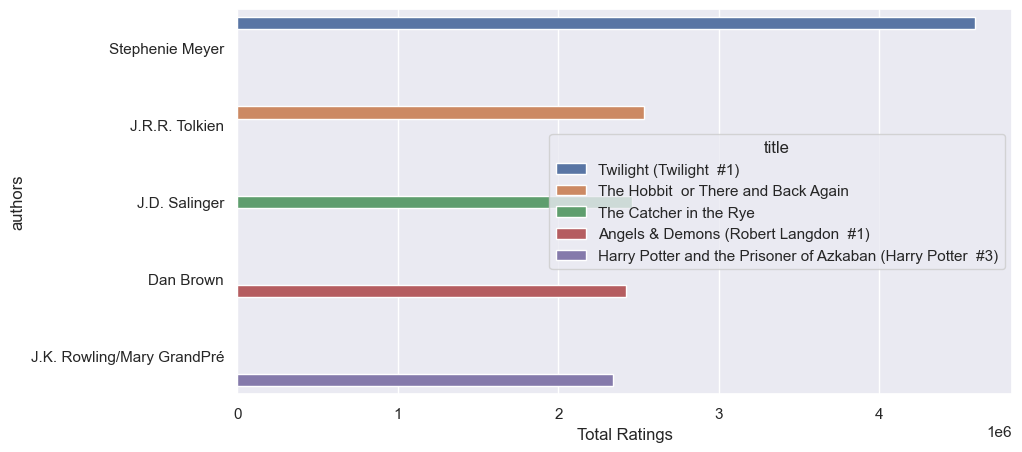

In [17]:
#author with more books rated
plt.figure(figsize=(10, 5))
authors = libros.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(x=authors['ratings_count'], y=authors.index, ci= None, hue=authors['title'])
plt.xlabel('Total Ratings')

Authors with more publications in a specific book, does it translate into more sales? or not really out of those books no longer sell so much? should we consider that after making their highest sales already begins a downward cycle?

Text(0.5, 0, 'Numero de publicaciones/Number of Publitacion')

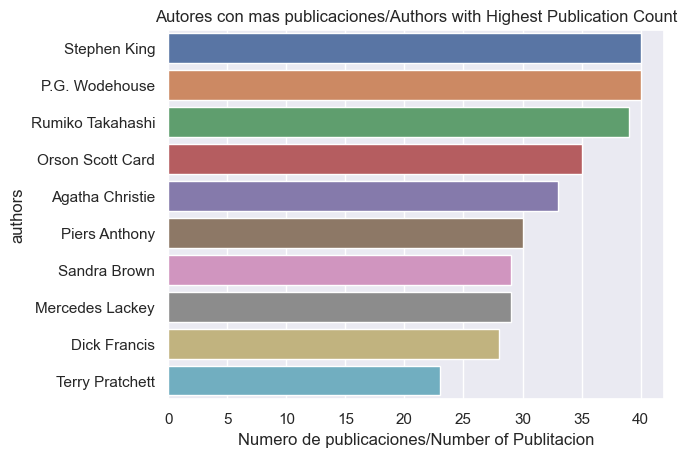

In [18]:
#author with more publications
top_authors = libros['authors'].value_counts().head(10)
sns.barplot(x=top_authors, y=top_authors.index)
plt.title('Autores con mas publicaciones/Authors with Highest Publication Count')
plt.xlabel('Numero de publicaciones/Number of Publitacion')

Currently we can observe that Stephen King together with Wodehouse fight the position in number of books published, taking into account that the same book will be found in different languages among the most requested as we observed above in English and Spanish.

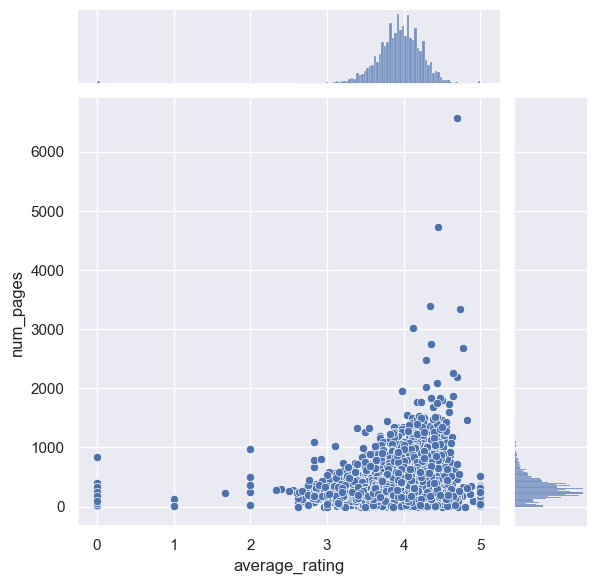

In [19]:
#we visualize the bivariate distribution between the rating and the number of pages.
sns.jointplot(x = 'average_rating', y= 'num_pages', data=libros)

We can see how sales are largely focused on books that have a rating between 2.5 and 4.8 with a number of pages less than 2000 / 1500. Therefore, those books that exceed the normal average, containing between 2000 and 6000 pages will have fewer sales and therefore will have to recover money, making them much more expensive than the rest, which further reduces the percentage of sales.

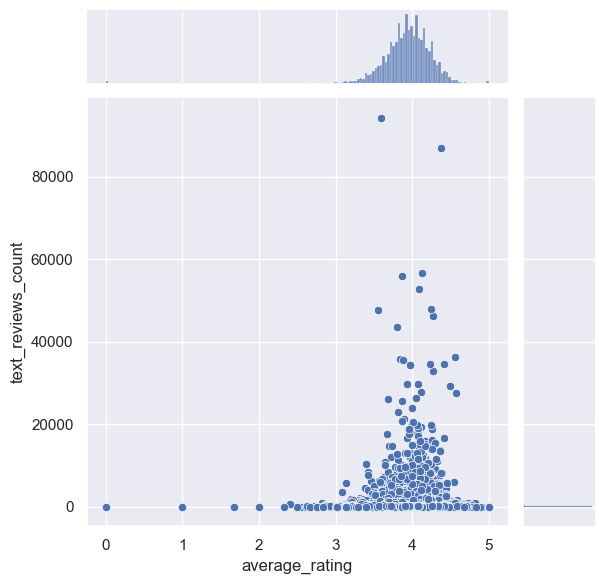

In [20]:
#visualize the bivariate distribution between rating and number of views
sns.jointplot(x='average_rating', y = 'text_reviews_count', data=libros)

In the number of books containing reviews, those with less text predominate, since books with less text are much more popular among people who wish to acquire literature in their daily lives but do not have enough time to do so.

In conclusion, we can define that the amount of book sales is influenced by the reviews, which in turn are achieved according to the number of pages and text contained in the book. We must also add to this the language in which the book is found, making this can have a greater amount of sales if it is in different languages, but the cost to translate the same different languages would be something to consider in case you want to cover a greater amount of sales. Therefore, the question that should be asked is the following:

Is it better to keep the book in English? taking into account that these are the sales that give more security?

Or maybe

Is it better to publish the book with at least 2 languages (English and Spanish)? taking the risk that maybe, due to the lack of reviews caused by the amount of pages and text that the book contains, it could generate a drop in sales? 

WHAT DO YOU THINK?